# MRI Contrast

MRI contrast is a rich dimension of information.  The following examples illustrate how MR contrast can vary in common pulse sequences.

In [3]:
addpath(genpath('../'))

## TE and T2/T2*

The transverse magnetization decays with $T_2$ (spin-echoes) or $T_2^*$ (gradient-echoes) once it is flipped by an RF pulse away from the z-axis.  Therefore, the $T_2/T_2^*$ contrast can be controlled by choosing the echo time (TE), which is the time between the center of the RF excitation pulse and the center of the data acquisition (when the center of k-space is acquired).  The signal is then proportional to
$$S_{GE} \propto M_0 \exp(-TE/T_2^*)$$

$$S_{SE} \propto M_0 \exp(-TE/T_2)$$

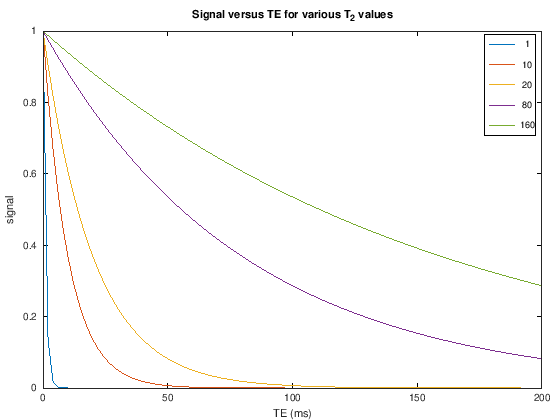

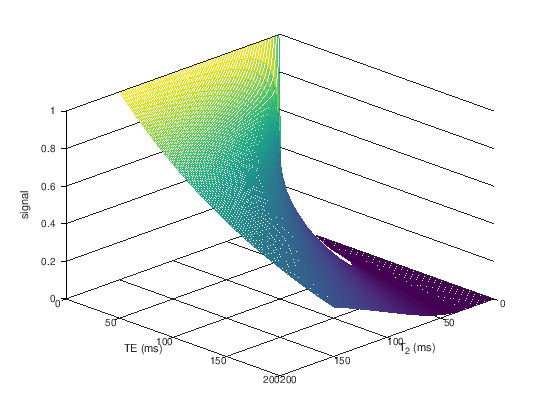

In [7]:
% TE

TE = linspace(0,200); % ms
T2v = [1;10;20;80;160];
[T2 TE] = meshgrid(T2v,TE);

S_TE = exp(-TE./T2);

plot(TE,S_TE)
xlabel('TE (ms)'), ylabel('signal')
legend(int2str(T2v))
title('Signal versus TE for various T_2 values')

TE = linspace(0,200); % ms
T2 = linspace(1,150); % ms
[T2 TE] = meshgrid(T2,TE);

S_TE = exp(-TE./T2);

figure

mesh(T2,TE,S_TE)
view([135 30])
ylabel('TE (ms)'), xlabel('T_2 (ms)'), zlabel('signal')



## TR and T1

The longitudinal magnetization recovers with $T_1$ back to its equilibrium amplitude, $M_0$.  However, we do not directly measure the longitudinal magnetization.  In order to create $T_1$ contrast in the MR signal, repeated RF pulses are applied with a given repetition time (TR), such that there is incomplete recovery of the longitudinal magnetization.  Then, after excitation, incomplete recovery appears in the transverse magnetization, creating $T_1$ contrast.

### 90-degree flip angles

The simplest case is using 90-degree flip angles every TR, in which case 
$$S \propto M_0 (1- \exp(-TR/T_1) )$$
Illustrated in the first example below.  This shows that the magnetization reaches steady state in the 2nd TR.

### < 90-degree flip angles

It is more efficient to use < 90-degree flip angles every TR, in which case 
$$S \propto M_0 \frac{1- \exp(-TR/T_1)}{1- \cos(\theta) \exp(-TR/T_1)}$$
Illustrated in the second example below.  This shows that the magnetization can take many TRs to reach steady state.



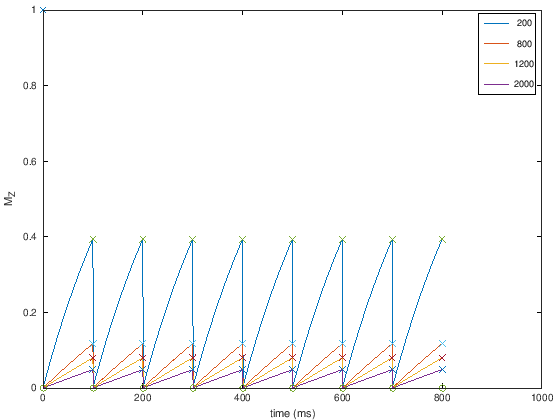

In [28]:
% TR with 90-degree pulses

M0 = 1; 

T1 = [200; 800; 1200; 2000]; %linspace(200,2000)'; % ms

NTR = 8;
flip = 90;
TR = 100; %ms
Nt_per_TR = 100;
t_per_TR = [1:Nt_per_TR]*TR/Nt_per_TR;
t_minus = [0:NTR]*TR; t_plus = t_minus + 1;

% magnetization before each RF pulse
Mz_minus = zeros(length(T1), NTR+1);
% magnetization after each RF pulse
Mz_plus = zeros(length(T1), NTR+1);

% initial condition
Mz_minus(:,1) = M0;
Mz_plus(:,1) = Mz_minus(:,1)*cos(flip*pi/180);
t = [0 eps];
Mz_all = [Mz_minus(:,1),Mz_plus(:,1)];


for I = 1:NTR
    t = [t, t_per_TR + (I-1)*TR];

    for It = 1:Nt_per_TR
        Mz_all = [Mz_all, Mz_plus(:,I).*exp(-t_per_TR(It)./T1) + M0*(1-exp(-t_per_TR(It)./T1))];
    end
    
    Mz_minus(:,I+1) = Mz_plus(:,I).*exp(-TR./T1) + M0*(1-exp(-TR./T1));
    Mz_plus(:,I+1) = Mz_minus(:,I+1).*cos(flip*pi/180);


end

plot(t, Mz_all, t_minus, Mz_minus, 'x', t_plus, Mz_plus,'o')
legend(int2str(T1))
xlabel('time (ms)'), ylabel('M_Z')

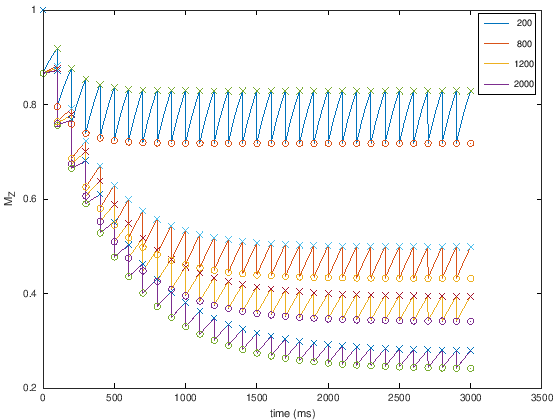

In [29]:
% TR with <90-degree pulses

M0 = 1; 

T1 = [200; 800; 1200; 2000]; %linspace(200,2000)'; % ms

NTR = 30;
flip = 30;
TR = 100; %ms
Nt_per_TR = 100;
t_per_TR = [1:Nt_per_TR]*TR/Nt_per_TR;
t_minus = [0:NTR]*TR; t_plus = t_minus + 1;

% magnetization before each RF pulse
Mz_minus = zeros(length(T1), NTR+1);
% magnetization after each RF pulse
Mz_plus = zeros(length(T1), NTR+1);

% initial condition
Mz_minus(:,1) = M0;
Mz_plus(:,1) = Mz_minus(:,1)*cos(flip*pi/180);
t = [0 eps];
Mz_all = [Mz_minus(:,1),Mz_plus(:,1)];


for I = 1:NTR
    t = [t, t_per_TR + (I-1)*TR];

    for It = 1:Nt_per_TR
        Mz_all = [Mz_all, Mz_plus(:,I).*exp(-t_per_TR(It)./T1) + M0*(1-exp(-t_per_TR(It)./T1))];
    end
    
    Mz_minus(:,I+1) = Mz_plus(:,I).*exp(-TR./T1) + M0*(1-exp(-TR./T1));
    Mz_plus(:,I+1) = Mz_minus(:,I+1).*cos(flip*pi/180);


end

plot(t, Mz_all, t_minus, Mz_minus, 'x', t_plus, Mz_plus,'o')
legend(int2str(T1))
xlabel('time (ms)'), ylabel('M_Z')

## Inversion Recovery

Another way to create $T_1$ contrast are "Inversion Recovery" techniques.  These use a 180-degree inversion pulse, following by an Inversion Time $TI$ delay during which $T_1$ contrast is created.  Then the magnetization is excited with a 90-degree pulse.

This strategy is commonly used to null tissue types.  For example, so-called short-time inversion recovery (STIR) is used to null fat signals, while fluid attenuated inversion recovery (FLAIR) is used to null fluids.

$$S_{IR} \propto M_0 (1 - 2\exp(-TI/T_1) + \exp(-TR/T_1) )$$

The illustration below shows that the magnetization reaches steady state in the 2nd TR of inversion recovery.


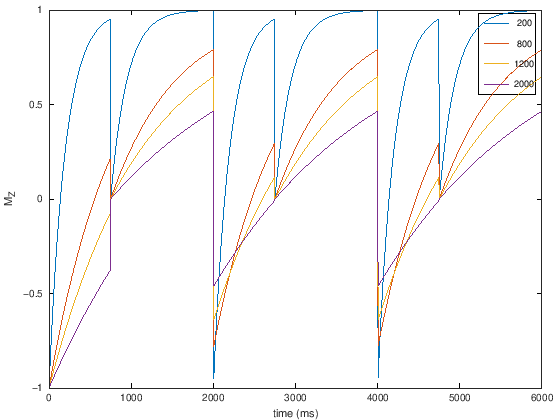

In [6]:
% Inversion Recovery

M0 = 1; 

T1 = [200; 800; 1200; 2000];

NTR = 3;
flip1 = 180; flip2 = 90;
TR = 2000; %ms
TI = 750; % ms

dt = 5; % ms
t_per_TR = dt:dt:TR;

% magnetization before each RF pulse
Mz1_minus = zeros(length(T1), NTR+1);
Mz2_minus = zeros(length(T1), NTR);
% magnetization after each RF pulse
Mz1_plus = zeros(length(T1), NTR+1);
Mz2_plus = zeros(length(T1), NTR);

% initial condition
Mz1_minus(:,1) = M0;
Mz1_plus(:,1) = Mz1_minus(:,1)*cos(flip1*pi/180);
Mz_all = [Mz1_minus(:,1),Mz1_plus(:,1)];
t= [0, eps];

for I = 1:NTR
    t = [t, t_per_TR + (I-1)*TR];

    % evolve for TI period after 180-pulse
    for It = find(t_per_TR < TI)
        Mz_all = [Mz_all, Mz1_plus(:,I).*exp(-t_per_TR(It)./T1) + M0*(1-exp(-t_per_TR(It)./T1))];
    end
    
    Mz2_minus(:,I) = Mz1_plus(:,I).*exp(-TI./T1) + M0*(1-exp(-TI./T1));
    Mz2_plus(:,I) = Mz2_minus(:,I).*cos(flip2*pi/180);

    for It = find(t_per_TR >= TI)
        Mz_all = [Mz_all, Mz2_plus(:,I).*exp(-(t_per_TR(It)-TI)./T1) + M0*(1-exp(-(t_per_TR(It)-TI)./T1))];
    end
    
    Mz1_minus(:,I+1) = Mz2_plus(:,I).*exp(-(TR-TI)./T1) + M0*(1-exp(-(TR-TI)./T1));
    Mz1_plus(:,I+1) = Mz1_minus(:,I+1).*cos(flip1*pi/180);

end

plot(t, Mz_all)
legend(int2str(T1))
xlabel('time (ms)'), ylabel('M_Z');

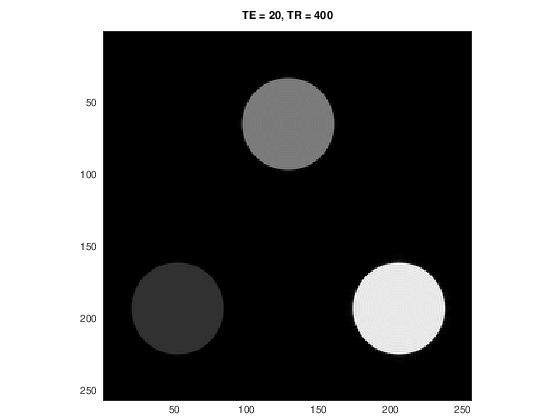

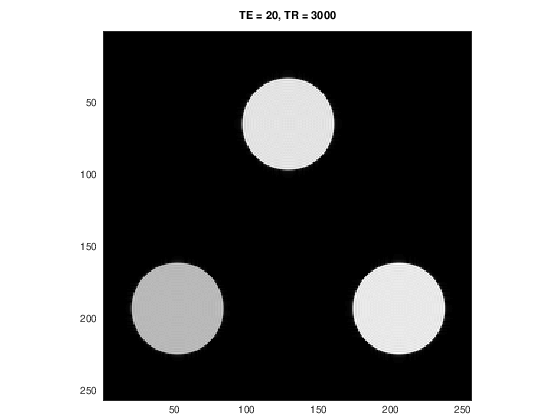

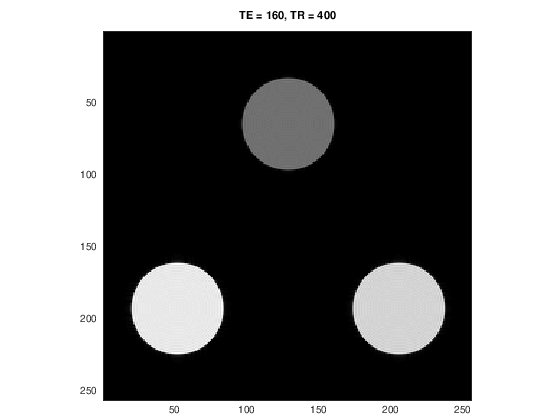

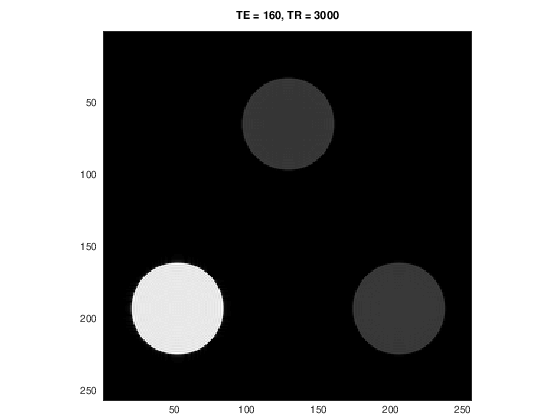

In [7]:
% contrast_phantom


Nphan = 3;
% phantom parameters
xc = [-.3 0 .3]*256;  % x centers
yc = [-.25 .25 -.25]*256;  % y centers
M0 = [1 1 1]; % relative proton densities
T1 = [.3 .8 3]*1e3;  % T1 relaxation times (ms)
T2 = [.06 .06 .2]*1e3;  % T2 relaxation times (ms)
r = 1/64;  % ball radius, where FOV = 1

flip = 90*pi/180;
TEs = [20 160]; TRs = [400 3000];

N = 256;

% matrices with kx, ky coordinates
[kx ky] = meshgrid([-N/2:N/2-1]/N);

for TE = TEs
    for TR = TRs

% initialize k-space data matrix
M = zeros(N,N);

% Generate k-space data by adding together k-space data for each
% individual phantom

for n= 1:Nphan
    % Generates data using Fourier Transform of a circle (jinc) multiplied by complex exponential to shift center location
    M = M+jinc(sqrt(kx.^2 + ky.^2) / (r) ) .* exp(i*2*pi* (kx*xc(n) + ky*yc(n))) * ...
        MRsignal_spoiled_gradient_echo(flip, TE, TR, M0(n), T1(n), T2(n));


end

% reconstruct and display ideal image
m = ifft2c(M);
figure
imagesc(abs(m)), colormap(gray), axis equal tight
title(['TE = ' int2str(TE) ', TR = ' int2str(TR)])

end
end